# Opioid Map Visualizations - Milestone 8 
The following notebook creates US maps for analysis

In [4]:
library(DBI)
library(usmap)
library(ggplot2)

In [5]:
#create a connection to the capstone.db 
con = dbConnect(RSQLite::SQLite(), "../../csv_processing/capstone.db")


In [6]:
#list the columns within the article table 
dbListFields(con, "opioid_state_long")

[1] "title"            "text"             "compound"         "neg"             
 [5] "neu"              "pos"              "title_length"     "text_length"     
 [9] "url_id"           "website_name"     "publication_type" "polarity"        
[13] "subjectivity"     "state"

In [7]:
#write query to df 
dfState = dbGetQuery(con, "SELECT * FROM state")
#display the top 5 rows 
head(dfState)

index State      ESOOS   
1 0     Alabama    Unfunded
2 1     Alaska     Funded  
3 2     Arizona    Unfunded
4 3     Arkansas   Unfunded
5 4     California Funded  
6 5     Colorado   Unfunded

In [8]:
#write query to df 
df = dbGetQuery(con, "SELECT * FROM opioid_state_long")
#display the top 5 rows 
head(df)

title                                                                                              
1 NIH cancer chief to serve as acting FDA commissioner                                               
2 Aspiring doctors seek advanced training in addiction medicine                                      
3 Steep Rise In Fentanyl-Linked Deaths Marks Opioid Epidemic's Third Wave : Shots - Health News : NPR
4 Addiction Medicine Lures A New Generation Of Idealistic Doctors : Shots - Health News : NPR        
5 Purdue Pharma Settles Opioid Lawsuit In Oklahoma : Shots - Health News : NPR                       
6 Women at Breast Implant Hearing Call for Disclosure of Safety Risks - The New York Times           
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [9]:
# Disconnect from the database
dbDisconnect(con)

In [10]:
#drop na values 
df = na.omit(df, cols=c("state", "compound", "text_length", "polarity", "subjectivity", 'website_name'))

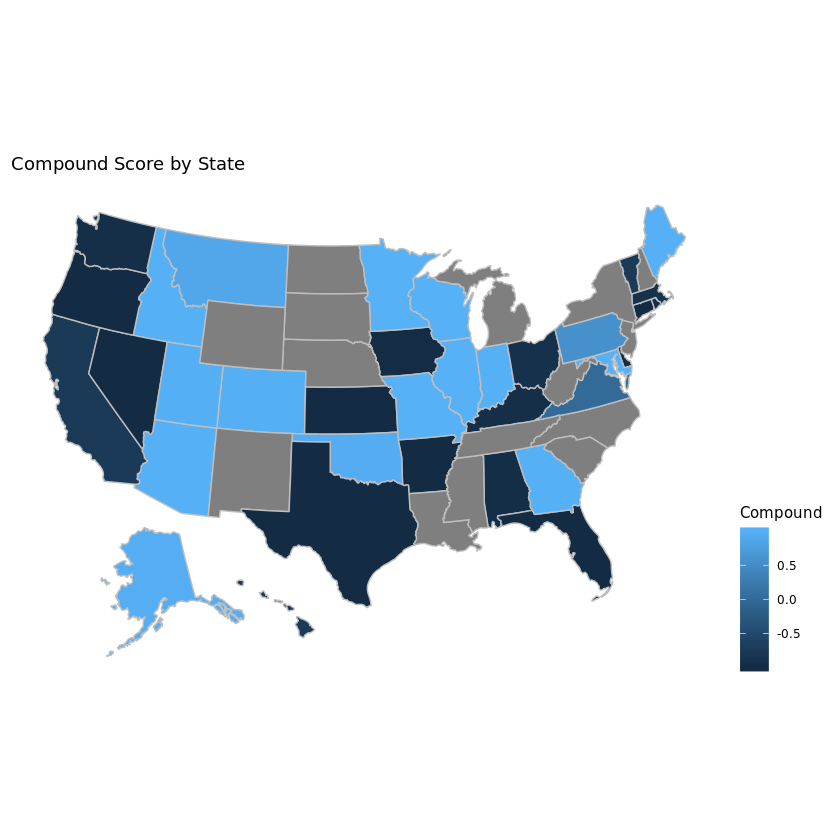

In [11]:
plot_usmap(data = df, values = "compound", lines = "grey") +
    scale_fill_continuous( name = "Compound") +
    theme(legend.position = "right") +
    labs(title = "Compound Score by State")

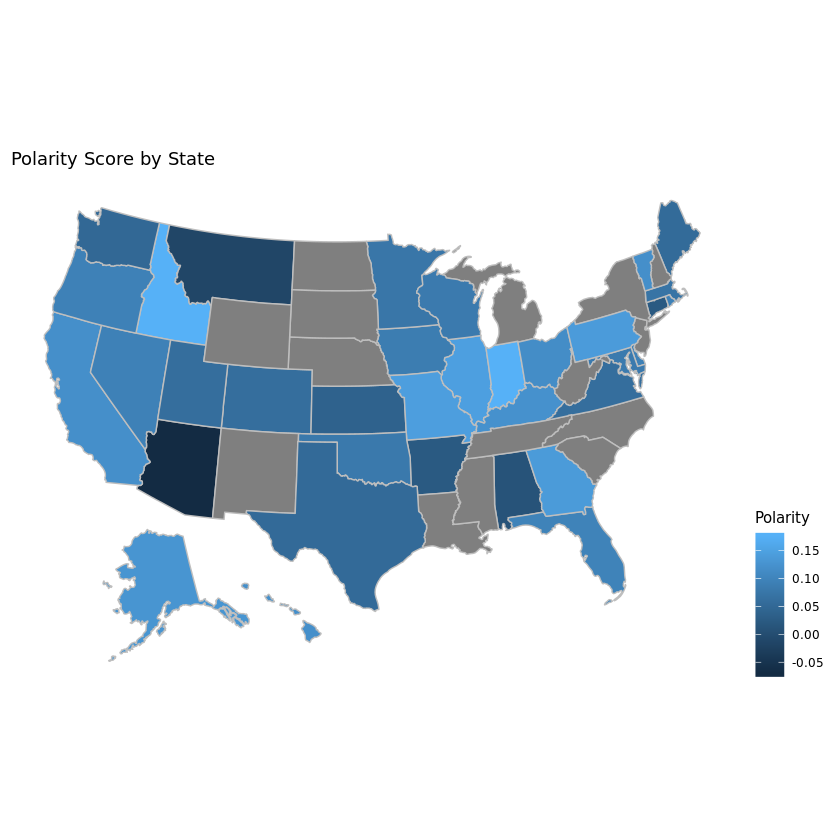

In [12]:
plot_usmap(data = df, values = "polarity", lines = "grey") +
    scale_fill_continuous( name = "Polarity") +
    theme(legend.position = "right") +
    labs(title = "Polarity Score by State")

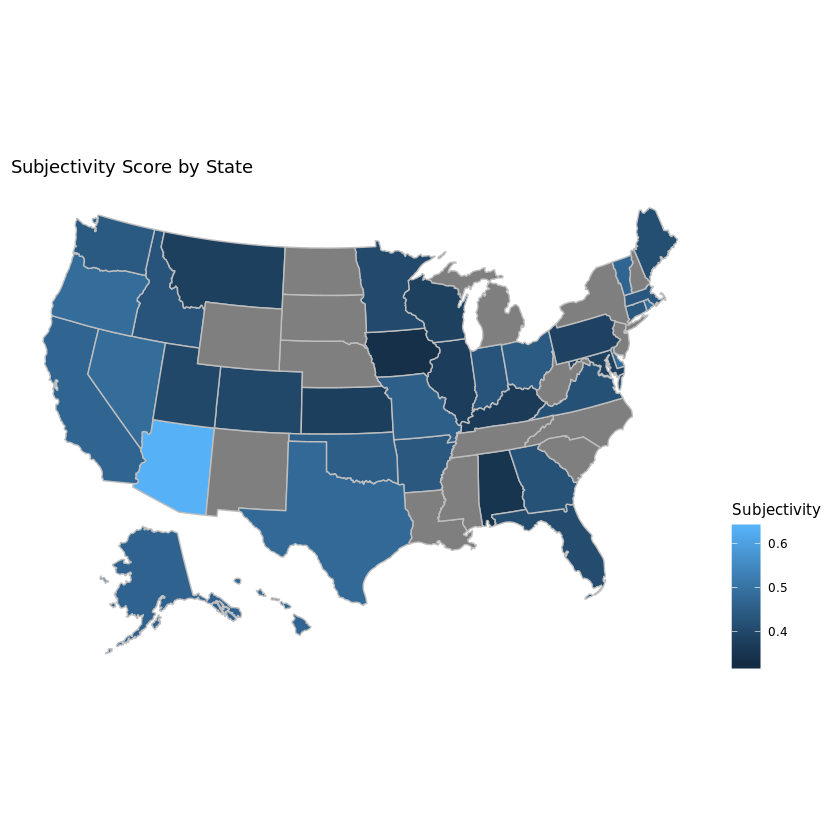

In [13]:
plot_usmap(data = df, values = "subjectivity", lines = "grey") +
    scale_fill_continuous( name = "Subjectivity") +
    theme(legend.position = "right") +
    labs(title = "Subjectivity Score by State")

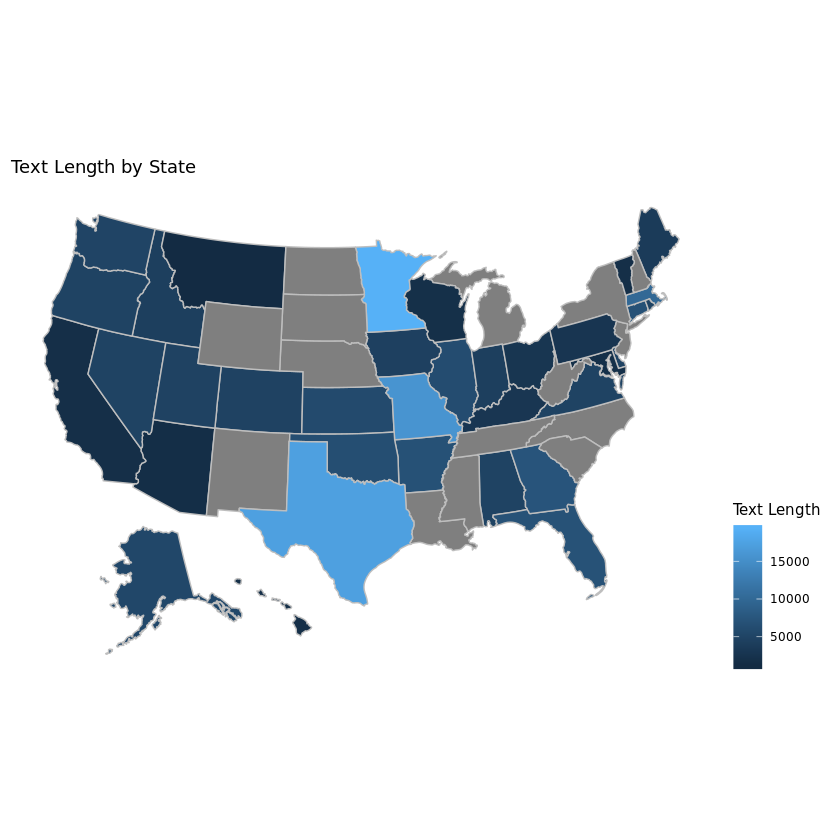

In [14]:
plot_usmap(data = df, values = "text_length", lines = "grey") +
    scale_fill_continuous( name = "Text Length") +
    theme(legend.position = "right") +
    labs(title = "Text Length by State")

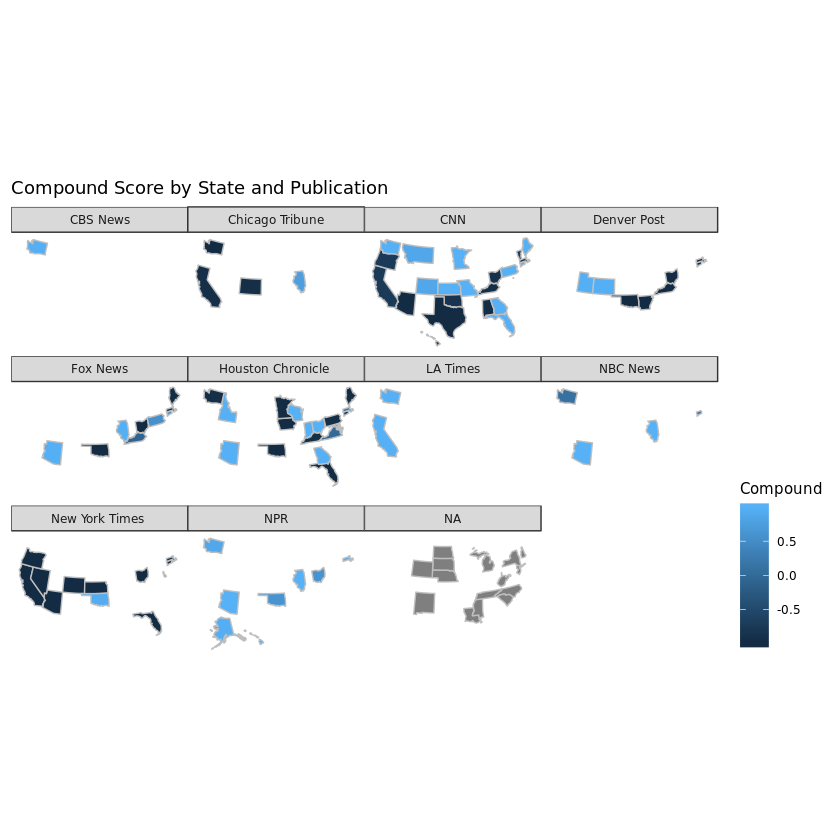

In [15]:
plot_usmap(data = df, values = "compound", lines = "grey") +
    facet_wrap(~website_name) + 
    scale_fill_continuous( name = "Compound") +
    theme(legend.position = "right") +
    labs(title = "Compound Score by State and Publication")

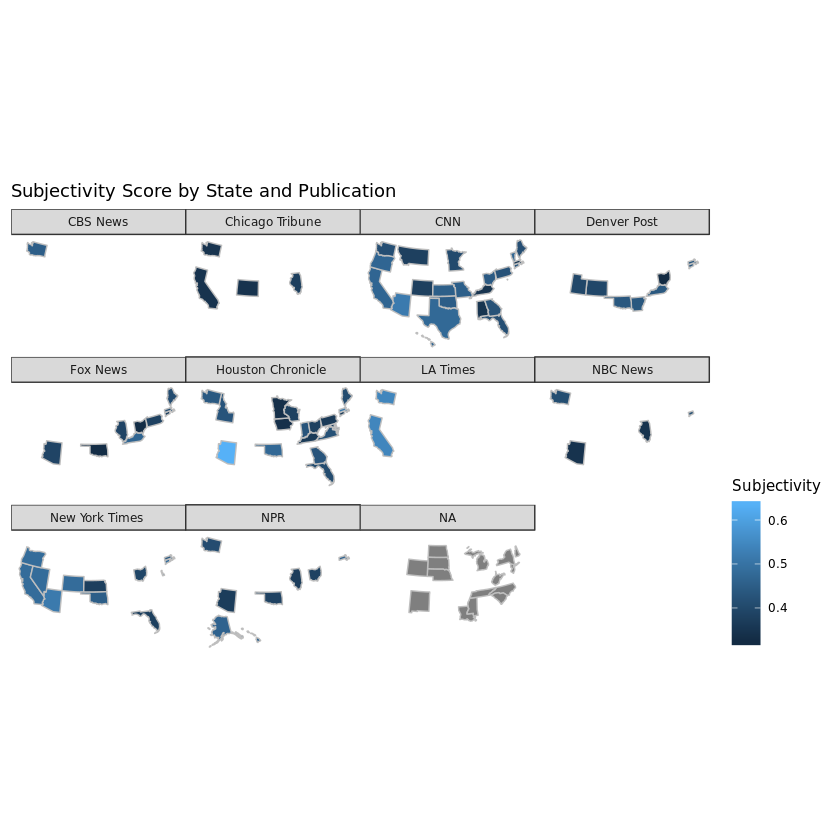

In [16]:
plot_usmap(data = df, values = "subjectivity", lines = "grey") +
    facet_wrap(~website_name) + 
    scale_fill_continuous( name = "Subjectivity") +
    theme(legend.position = "right") +
    labs(title = "Subjectivity Score by State and Publication")

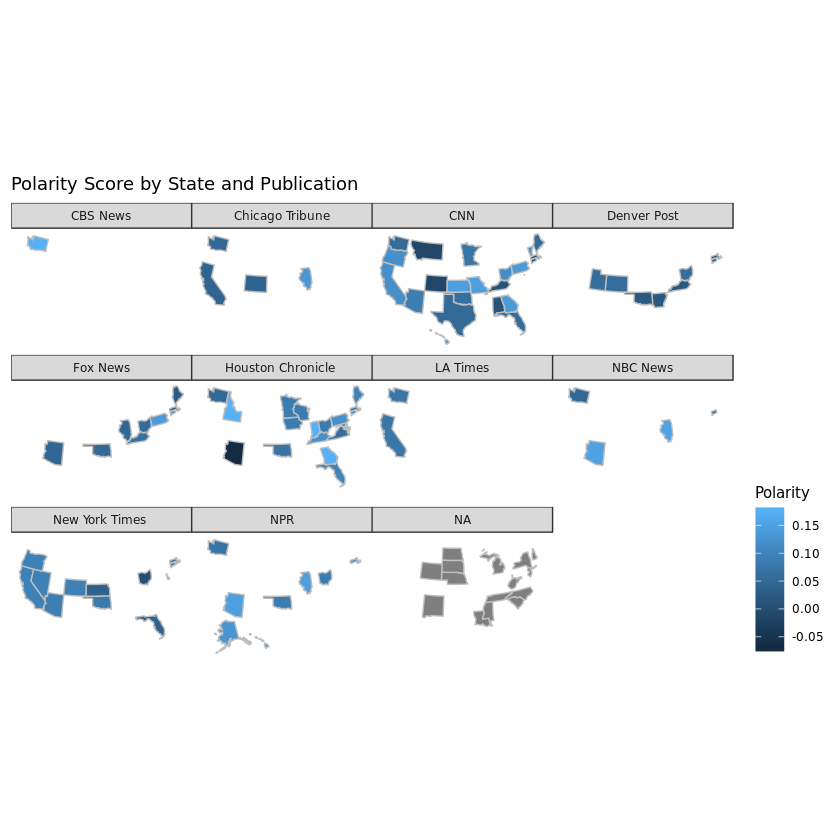

In [17]:

plot_usmap(data = df, values = "polarity", lines = "grey") +
    facet_wrap(~website_name) + 
    scale_fill_continuous( name = "Polarity") +
    theme(legend.position = "right") +
    labs(title = "Polarity Score by State and Publication")

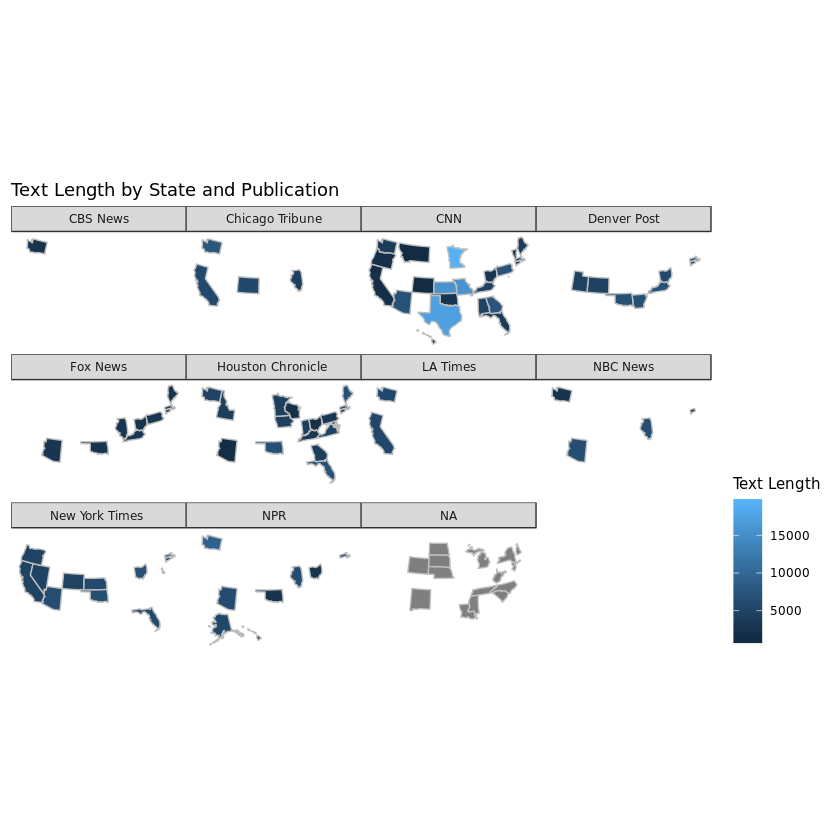

In [18]:
plot_usmap(data = df, values = "text_length", lines = "grey") +
    facet_wrap(~website_name) + 
    scale_fill_continuous( name = "Text Length") +
    theme(legend.position = "right") +
    labs(title = "Text Length by State and Publication")

In [19]:

#rename column name for usmap to use 
names(dfState)[2]<-"state"

head(dfState)

index state      ESOOS   
1 0     Alabama    Unfunded
2 1     Alaska     Funded  
3 2     Arizona    Unfunded
4 3     Arkansas   Unfunded
5 4     California Funded  
6 5     Colorado   Unfunded

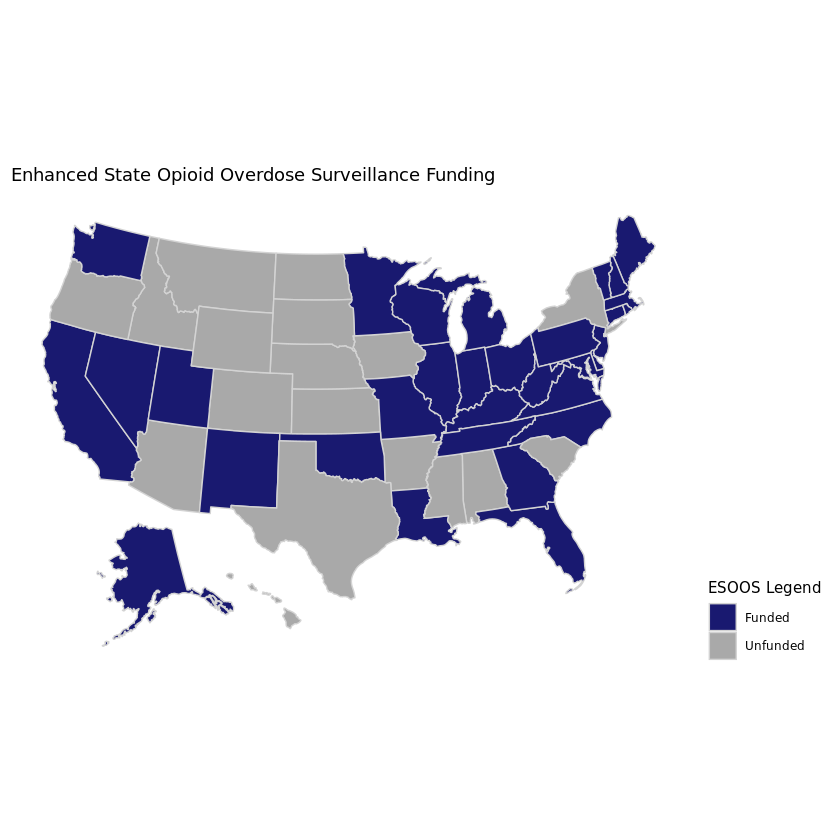

In [20]:
   
plot_usmap(data = dfState, values = "ESOOS", lines = "light grey") +
    scale_fill_manual(values = c("midnight blue", "dark grey"), name = "ESOOS Legend", na.translate = F) +
    theme(legend.position = "right") +
    labs(title = "Enhanced State Opioid Overdose Surveillance Funding")